
# What is PyTorch?

It’s a Python based scientific computing package targeted at two sets of audiences:

-  Tensorial library that uses the power of GPUs
-  A deep learning research platform that provides maximum flexibility and speed

## Import the library

In [16]:
import torch  # <Ctrl> / <Shift> + <Return>

## Getting help in Jupyter

In [17]:
torch.sq  # <Tab>

AttributeError: module 'torch' has no attribute 'sq'

In [18]:
# What about all `*Tensor`s?
torch.*Tensor?

In [19]:
torch.nn.Module()  # <Shift>+<Tab>

Module()

In [20]:
# Annotate your functions / classes!
torch.nn.Module?

In [21]:
torch.nn.Module??

## Dropping to Bash: magic!

In [22]:
!ls -lh

total 320
-rw-r--r--  1 ritchieng  staff   117K Nov  4 13:31 01-tensor_tutorial.ipynb
-rw-r--r--  1 ritchieng  staff   6.4K Nov  4 13:12 02-space_stretching.ipynb
-rw-r--r--  1 ritchieng  staff   3.2K Nov  4 13:09 02b-space_stretching.ipynb
-rw-r--r--  1 ritchieng  staff   5.4K Nov  3 17:04 03-autograd_tutorial.ipynb
-rw-r--r--  1 ritchieng  staff   6.9K Nov  4 13:04 04-spiral_classification.ipynb
-rw-r--r--  1 ritchieng  staff   3.8K Nov  4 13:19 README.md
drwxr-xr-x  4 ritchieng  staff   128B Nov  4 13:29 __pycache__
-rw-r--r--  1 ritchieng  staff   164B Nov  3 17:04 environment.yml
drwxr-xr-x  3 ritchieng  staff    96B Nov  3 17:04 img
-rw-r--r--  1 ritchieng  staff   1.2K Nov  4 13:04 plot_lib.py
drwxr-xr-x  4 ritchieng  staff   128B Nov  4 13:04 raw


In [23]:
%%bash
for f in $(ls *.*); do
    echo $(wc -l $f)
done

1718 01-tensor_tutorial.ipynb
270 02-space_stretching.ipynb
150 02b-space_stretching.ipynb
291 03-autograd_tutorial.ipynb
292 04-spiral_classification.ipynb
97 README.md
11 environment.yml
40 plot_lib.py


In [24]:
# Getting some general help
%magic

## Python native data types

Python has many native datatypes. Here are the important ones:

 - **Booleans** are either `True` or `False`.
 - **Numbers** can be integers (1 and 2), floats (1.1 and 1.2), fractions (1/2 and 2/3), or even complex numbers.
 - **Strings** are sequences of Unicode characters, e.g. an html document.
 - **Lists** are ordered sequences of values.
 - **Tuples** are ordered, immutable sequences of values.
 - **Sets** are unordered bags of values.
 - **Dictionaries** are unordered bags of key-value pairs.
 
See [here](http://www.diveintopython3.net/native-datatypes.html) for a complete overview.

### More resources

 1. Brief Python introduction [here](https://learnxinyminutes.com/docs/python3/).
 2. Full Python tutorial [here](https://docs.python.org/3/tutorial/).
 3. A Whirlwind Tour of Python [here](https://github.com/jakevdp/WhirlwindTourOfPython).
 4. Python Data Science Handbook [here](https://github.com/jakevdp/PythonDataScienceHandbook).

## Torch!

In [25]:
t = torch.Tensor(2, 3, 4)
type(t)

torch.Tensor

In [26]:
t.size()

torch.Size([2, 3, 4])

In [27]:
# t.size() is a classic tuple =>
print('t size:', ' \u00D7 '.join(map(str, t.size())))

t size: 2 × 3 × 4


In [ ]:
print(f'point in a {t.numel()} dimensional space')
print(f'organised in {t.dim()} sub-dimensions')

In [30]:
t

tensor([[[ 0.0000, -0.0000,  0.0000, -0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000]]])

In [31]:
# Mind the underscore!
# Any operation that mutates a tensor in-place is post-fixed with an _.
# For example: x.copy_(y), x.t_(), x.random_(n) will change x.
t.random_(10)

tensor([[[4., 9., 5., 1.],
         [0., 4., 2., 9.],
         [5., 6., 7., 2.]],

        [[6., 1., 3., 9.],
         [4., 1., 8., 9.],
         [4., 6., 0., 1.]]])

In [32]:
t

tensor([[[4., 9., 5., 1.],
         [0., 4., 2., 9.],
         [5., 6., 7., 2.]],

        [[6., 1., 3., 9.],
         [4., 1., 8., 9.],
         [4., 6., 0., 1.]]])

In [33]:
r = torch.Tensor(t)
r.resize_(3, 8)
r

tensor([[4., 9., 5., 1., 0., 4., 2., 9.],
        [5., 6., 7., 2., 6., 1., 3., 9.],
        [4., 1., 8., 9., 4., 6., 0., 1.]])

In [34]:
r.zero_()

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [35]:
t

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [36]:
# This *is* important, sigh...
s = r.clone()

In [37]:
s.fill_(1)
s

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [38]:
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

## Vectors (1D Tensors)

In [39]:
v = torch.Tensor([1, 2, 3, 4]); v

tensor([1., 2., 3., 4.])

In [40]:
print(f'dim: {v.dim()}, size: {v.size()[0]}')

SyntaxError: invalid syntax (<ipython-input-40-e754207520bf>, line 1)

In [42]:
w = torch.Tensor([1, 0, 2, 0]); w

tensor([1., 0., 2., 0.])

In [43]:
# Element-wise multiplication
v * w

tensor([1., 0., 6., 0.])

In [44]:
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
v @ w

tensor(7.)

In [45]:
x = torch.Tensor(5).random_(10); x

tensor([5., 3., 4., 5., 0.])

In [46]:
print(f'first: {x[0]}, last: {x[-1]}')

SyntaxError: invalid syntax (<ipython-input-46-1177c624e802>, line 1)

In [47]:
# Extract sub-Tensor [from:to)
x[1:2 + 1]

tensor([3., 4.])

In [48]:
v

tensor([1., 2., 3., 4.])

In [49]:
v = torch.arange(1, 4 + 1); v

tensor([1, 2, 3, 4])

In [50]:
print(v.pow(2), v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


In [51]:
print(v.pow_(2), v)

tensor([ 1,  4,  9, 16]) tensor([ 1,  4,  9, 16])


## Matrices (2D Tensors)

In [53]:
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]]); m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [54]:
m.dim()

2

In [55]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [56]:
m.numel()

8

In [57]:
m[0][2]

tensor(3.)

In [58]:
m[0, 2]

tensor(3.)

In [59]:
m[:, 1]

tensor([5., 2.])

In [60]:
m[:, [1]]

tensor([[5.],
        [2.]])

In [61]:
m[[0], :]

tensor([[2., 5., 3., 7.]])

In [62]:
m[0, :]

tensor([2., 5., 3., 7.])

In [66]:
v = torch.arange(1., 4 + 1); v

tensor([1., 2., 3., 4.])

In [67]:
m @ v

tensor([49., 47.])

In [68]:
m[[0], :] @ v

tensor([49.])

In [69]:
m[[1], :] @ v

tensor([47.])

In [70]:
m + torch.rand(2, 4)

tensor([[2.5795, 5.8933, 3.7181, 7.4178],
        [4.5569, 2.6596, 1.2656, 9.2391]])

In [71]:
m - torch.rand(2, 4)

tensor([[1.1466, 4.8810, 2.0470, 6.1473],
        [3.9292, 1.8340, 0.4156, 8.4651]])

In [72]:
m * torch.rand(2, 4)

tensor([[1.0699, 0.8105, 0.6167, 5.5334],
        [0.3121, 0.1525, 0.6225, 6.6215]])

In [73]:
m / torch.rand(2, 4)

tensor([[ 3.4969,  7.0581,  3.7694,  8.4190],
        [89.3185, 10.3503, 36.6860, 10.2126]])

In [74]:
m.t()

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [75]:
# Same as
m.transpose(0, 1)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

## Constructors

In [77]:
torch.arange(3., 8 + 1)

tensor([3., 4., 5., 6., 7., 8.])

In [78]:
torch.arange(5.7, -3, -2.1)

tensor([ 5.7000,  3.6000,  1.5000, -0.6000, -2.7000])

In [79]:
torch.linspace(3, 8, 20).view(1, -1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [80]:
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [81]:
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [82]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [83]:
from plot_lib import set_default

In [84]:
set_default()

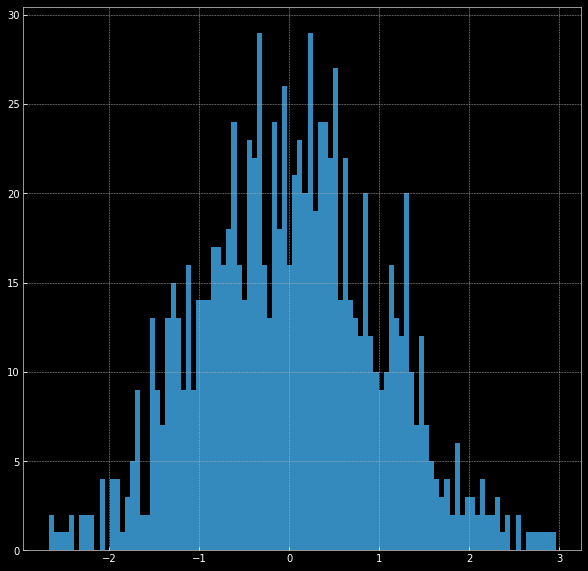

In [85]:
# Numpy bridge!
plt.hist(torch.randn(1000).numpy(), 100);

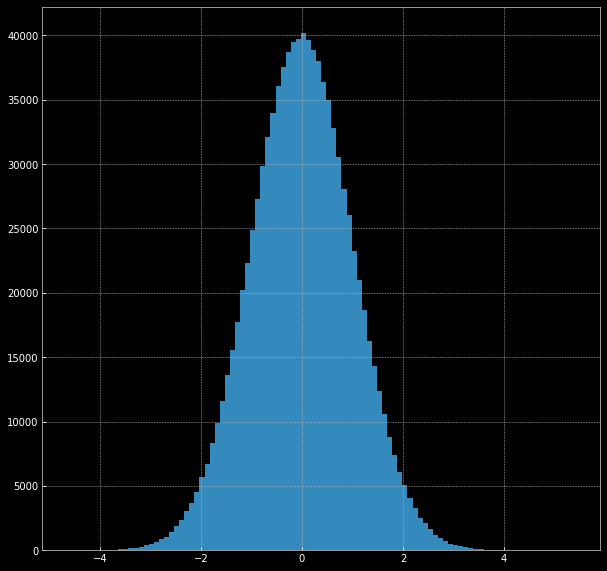

In [86]:
plt.hist(torch.randn(10**6).numpy(), 100);  # how much does this chart weight?
# use rasterized=True for SVG/EPS/PDF!

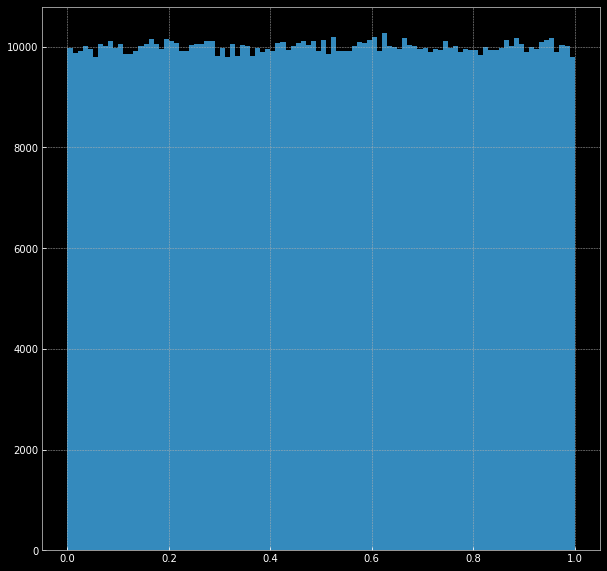

In [87]:
plt.hist(torch.rand(10**6).numpy(), 100);

## Casting

In [12]:
torch.*Tensor?

In [88]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [89]:
m.double()

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], dtype=torch.float64)

In [90]:
m.byte()

tensor([[2, 5, 3, 7],
        [4, 2, 1, 9]], dtype=torch.uint8)

In [91]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
m.to(device)

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [92]:
m_np = m.numpy(); m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [93]:
m_np[0, 0] = -1; m_np

array([[-1.,  5.,  3.,  7.],
       [ 4.,  2.,  1.,  9.]], dtype=float32)

In [94]:
m

tensor([[-1.,  5.,  3.,  7.],
        [ 4.,  2.,  1.,  9.]])

In [96]:
import numpy as np
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)

[0 1 2 3 4] tensor([0, 1, 2, 3, 4])


In [97]:
n.mul_(2)
n_np

array([0, 2, 4, 6, 8])

## More fun

In [98]:
a = torch.Tensor([[1, 2, 3, 4]])
b = torch.Tensor([[5, 6, 7, 8]])
print(a, b)

tensor([[1., 2., 3., 4.]]) tensor([[5., 6., 7., 8.]])


In [99]:
torch.cat((a, b), 0)

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])

In [101]:
torch.cat((a, b), 1)

tensor([[1., 2., 3., 4., 5., 6., 7., 8.]])

## Much more

There's definitely much more, but this was the basics about `Tensor`s fun.

*Torch* full API should be read at least once.
Hence, go [here](http://pytorch.org/docs/0.3.0/torch.html).
You'll find 100+ `Tensor` operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc are described.